<a href="https://colab.research.google.com/github/ghliddy/assignment-4/blob/main/Liddy_Grossman_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

Part 1

In [1]:
import pandas as pd

#1
env_df = pd.read_csv('https://raw.githubusercontent.com/ghliddy/assignment-4/main/data/Arrigetch_Peaks_Environmental_Data.csv')

env_df.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090,45,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920,315,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950,225,-9999,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...


In [2]:
#1
env_df.shape

(439, 11)

In [3]:
#1
species_df = pd.read_csv('https://raw.githubusercontent.com/ghliddy/assignment-4/main/data/Arrigetch_Peaks_Species_Data.csv')
species_df.head()

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [4]:
#1
species_df.shape

(439, 409)

In [5]:
env = env_df
species = species_df

Part 2

In [6]:
#2
import numpy as np
env = env.replace(-9999., np.NaN)
env

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090.0,45.0,NaN,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920.0,315.0,NaN,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940.0,270.0,NaN,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950.0,225.0,NaN,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935.0,270.0,NaN,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
...,...,...,...,...,...,...,...,...,...,...,...
434,11359,Carex podocarpa-Salix rotundifolia comm.,960.0,NaN,0.0,10,0,10,0,1,In Table 12 of unpublished thesis (Cooper 1983...
435,11360,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,5,0,3,15,3,In Table 12 of unpublished thesis (Cooper 1983...
436,11361,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,0,0,5,20,5,In Table 12 of unpublished thesis (Cooper 1983...
437,11362,Senecio tomentosus-Salix rotundifolia comm.,1550.0,360.0,NaN,5,0,0,10,8,In Table 12 of unpublished thesis (Cooper 1983...


In [7]:
#2
species = species.replace(-9999., np.NaN)

Part 3

In [8]:
#3
len(pd.unique(env_df['PLANT_COMMUNITY_NAME']))

51

Part 4

In [9]:
#4
num_cols = ['ELEVATION', 'ASPECT', 'SLOPE',	'COVER_LITTER_LAYER',	'COVER_OPEN_WATER',	'COVER_ROCK', 'COVER_CRUST', 'COVER_BARE_SOIL']

env[num_cols].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


Part 5

In [10]:
#5
merged_plot = pd.merge(left=env, right=species, how='left', left_on='TURBOVEG_PLOT_NUMBER', right_on='TURBOVEG_PLOT_NUMBER')
print(merged_plot.shape)
merged_plot

(439, 419)


,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090.0,45.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920.0,315.0,NaN,0,0,0,0,0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940.0,270.0,NaN,0,0,0,0,0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950.0,225.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935.0,270.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,11359,Carex podocarpa-Salix rotundifolia comm.,960.0,NaN,0.0,10,0,10,0,1,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
435,11360,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,5,0,3,15,3,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
436,11361,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,0,0,5,20,5,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
437,11362,Senecio tomentosus-Salix rotundifolia comm.,1550.0,360.0,NaN,5,0,0,10,8,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


Part 6

In [11]:
#6
merged_plot.isnull()
sum(merged_plot.isnull().any(axis=1))

422

Part 7

In [12]:
#7

population_of_species = {}

for each in species.columns:
  if each != 'TURBOVEG_PLOT_NUMBER':
    population_of_species[each] = species[each][species[each]>0].shape[0]


list_of_species = []
for each in population_of_species:
  list_of_species.append(each)

biggest_species = ""
biggest_species_population = 0

counter = 0
for each in population_of_species:
  if population_of_species[list_of_species[counter]] > biggest_species_population:
    biggest_scecpies_population = population_of_species[list_of_species[counter]]
    biggest_species = [list_of_species[counter]]
  counter += 1

print(biggest_species[0])







Xanthoria elegans


Part 8

In [14]:
#8

myList = [0]
for each in range(0,439):
  for col in species.columns:
    if col != 'TURBOVEG_PLOT_NUMBER':
      myList[each] += (species.loc[each,col])
      myList.append(0)

del myList[439:]


species['totals'] = myList
print(species)

     TURBOVEG_PLOT_NUMBER  Abietinella abietina  Acarospora schleicheri  \
0                   10925                   0.0                     0.0   
1                   10926                   0.0                     0.0   
2                   10927                   0.0                     0.0   
3                   10928                   0.0                     0.0   
4                   10929                   0.0                     0.0   
..                    ...                   ...                     ...   
434                 11359                   0.0                     0.0   
435                 11360                   0.0                     0.0   
436                 11361                   0.0                     0.0   
437                 11362                   0.5                     0.0   
438                 11363                   1.0                     0.0   

     Aconitum delphinifolium delphinifolium  Alectoria ochroleuca  \
0                             

Part 9

In [36]:
#9
#25% cover is counted twice, both in class 2 and 3


## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




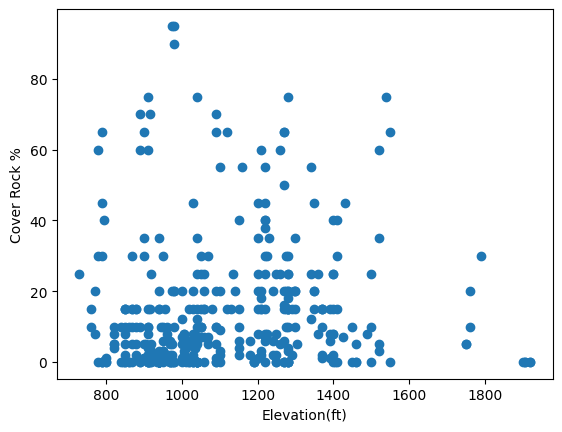

there is no relationship between these variables


In [18]:
#1
import matplotlib.pyplot as plt

df_sub = env.loc[(env['ELEVATION']>0) & (env['COVER_ROCK'].notnull()),:].reset_index(drop=True)
figure, ax = plt.subplots()
ax.scatter(df_sub['ELEVATION'], df_sub['COVER_ROCK'])
ax.set_xlabel('Elevation(ft)') # x axis label
ax.set_ylabel('Cover Rock %') # y axis label
plt.show()

print('there is no relationship between these variables')

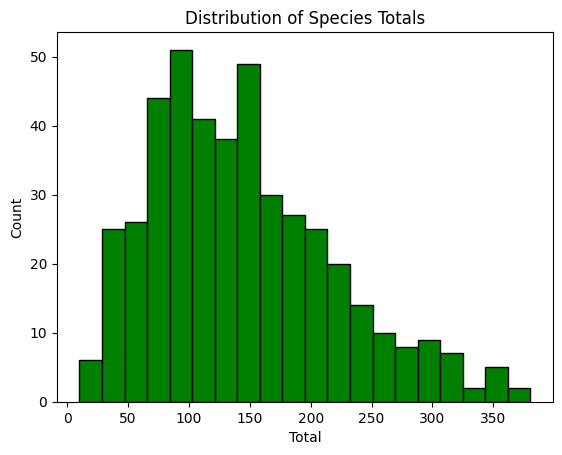

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

In [21]:
#2

figure, ax = plt.subplots()
ax.hist(species['totals'],bins=20, color="green", edgecolor='black')
ax.set_xlabel('Total')
ax.set_ylabel('Count')
ax.set_title('Distribution of Species Totals')
plt.show()

species['totals'].describe()

In [23]:
#3
sub_df1 = env.loc[env["PLANT_COMMUNITY_NAME"] == "Caricetum scirpoideae-rupestris", :]
pd.unique(sub_df1["PLANT_COMMUNITY_NAME"])

array(['Caricetum scirpoideae-rupestris'], dtype=object)

In [24]:
#3
sub_df2 = env.loc[env["PLANT_COMMUNITY_NAME"] == "Pedicularo kanei-Caricetum glacialis", :]
pd.unique(sub_df2["PLANT_COMMUNITY_NAME"])

array(['Pedicularo kanei-Caricetum glacialis'], dtype=object)

In [26]:
#3
sub_df3 = env.loc[env["PLANT_COMMUNITY_NAME"] == "Saxifrago tricuspidatae-Artemisietum alaskanae", :]
pd.unique(sub_df3["PLANT_COMMUNITY_NAME"])

array(['Saxifrago tricuspidatae-Artemisietum alaskanae'], dtype=object)

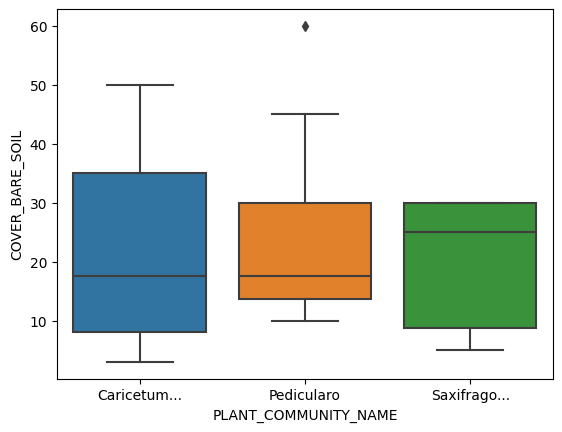

In [35]:
#4
import seaborn as sns

subset_df = env.loc[(env["PLANT_COMMUNITY_NAME"] == "Caricetum scirpoideae-rupestris") | (env["PLANT_COMMUNITY_NAME"] == "Pedicularo kanei-Caricetum glacialis") | (env["PLANT_COMMUNITY_NAME"] == "Saxifrago tricuspidatae-Artemisietum alaskanae")]

subset_df.reset_index(drop=True)

subset_df = subset_df.replace("Caricetum scirpoideae-rupestris", "Caricetum...")
subset_df = subset_df.replace("Pedicularo kanei-Caricetum glacialis", "Pedicularo")
subset_df = subset_df.replace("Saxifrago tricuspidatae-Artemisietum alaskanae", "Saxifrago...")

sns.boxplot(data=subset_df, x="PLANT_COMMUNITY_NAME", y="COVER_BARE_SOIL")
plt.show()

